In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
list1 = [1,2,3,4,5]

In [4]:
list1

[1, 2, 3, 4, 5]

In [5]:
#list comprehension
[i**2 for i in list1]

[1, 4, 9, 16, 25]

In [6]:
list2d = [[1,2,3,4,5] , [6,7,8,9,10]]

In [7]:
list2d

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

### Data

In [8]:
age = [25,27,35,41,48,56]
sex = ['M','F','M','F','M','M']
income = [1500,2500,4000,5500,6300,8000]
height = [1.5,1.78,2,1.9,1.4,1.6]

In [9]:
df = pd.DataFrame({"age" : age ,
                 "sex" : sex,
                 "income" : income ,
                  "height" : height})

In [49]:
df

,age,sex,income,height
0,25,M,1500,1.50
1,27,F,2500,1.78
2,35,M,4000,2.00
3,41,F,5500,1.90
4,48,M,6300,1.40
5,56,M,8000,1.60


In [60]:
print(df.shape)
print(df.size)
print(df.nunique)
print(df.info())
print(df.describe())

(6, 4)
24
<bound method DataFrame.nunique of    age sex  income  height
0   25   M    1500    1.50
1   27   F    2500    1.78
2   35   M    4000    2.00
3   41   F    5500    1.90
4   48   M    6300    1.40
5   56   M    8000    1.60>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     6 non-null      int64  
 1   sex     6 non-null      object 
 2   income  6 non-null      int64  
 3   height  6 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 320.0+ bytes
None
             age       income    height
count   6.000000     6.000000  6.000000
mean   38.666667  4633.333333  1.696667
std    12.077527  2434.474618  0.235089
min    25.000000  1500.000000  1.400000
25%    29.000000  2875.000000  1.525000
50%    38.000000  4750.000000  1.690000
75%    46.250000  6100.000000  1.870000
max    56.000000  8000.000000  2.000000


### Data Mining

In [11]:
df.groupby('height')['income'].mean()

height
1.40    6300.0
1.50    1500.0
1.60    8000.0
1.78    2500.0
1.90    5500.0
2.00    4000.0
Name: income, dtype: float64

In [12]:
df.groupby('sex')['height'].var()

sex
F    0.007200
M    0.069167
Name: height, dtype: float64

In [13]:
df.groupby('sex')['height'].std()

sex
F    0.084853
M    0.262996
Name: height, dtype: float64

In [14]:
df[(df['height'] < 1.8)  & (df['sex'] == 'M')]['income'].max()

8000

In [15]:
df[df['sex'] == 'F']['income'].max()

5500

### Visualisation

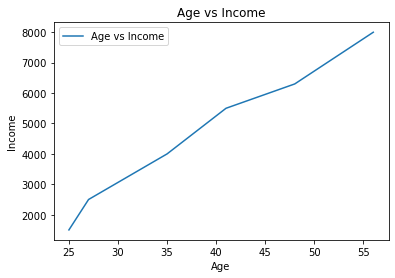

In [18]:
plt.plot(df['age'] , df['income'] , label = 'Age vs Income' )
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.legend()
plt.show()

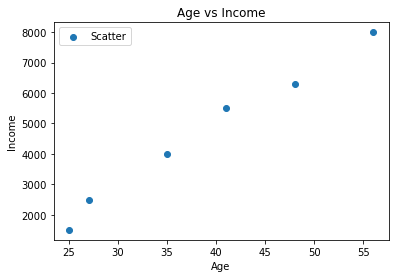

In [21]:
plt.scatter(df['age'] , df['income'] , label = 'Scatter' )
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.legend()
plt.show()

### Machine Learning - Linear Regression

In [42]:
age = [25,27,35,41,48,56,62]
income = [1500,2500,4000,5500,6300,8000,10000]

In [43]:
age

[25, 27, 35, 41, 48, 56, 62]

In [44]:
income

[1500, 2500, 4000, 5500, 6300, 8000, 10000]

In [45]:
# polyfit function fits the linear model z to the data points
z = np.polyfit(age,income,1)
# poly1d functions creates the actual function used to display the data points  
p = np.poly1d(z)


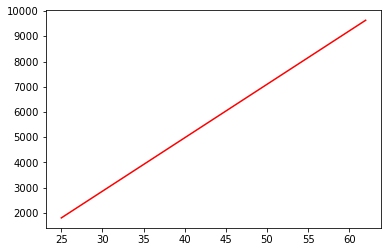

In [46]:
plt.plot(age,p(age) , 'r-')
plt.show()

In [47]:
# linear regression formula
print(np.poly1d(p))

 
211.8 x - 3495


In [48]:
#forecasting
print(np.poly1d(p(65)))

 
1.027e+04


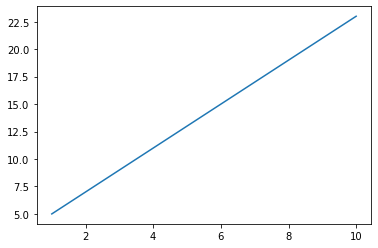

In [63]:
import numpy as np
import matplotlib.pyplot as plt
i=3        # intercept
s=2        # slope
x=np.linspace(1,10,50)  # from 1 to 10, by 50
plt.plot(x, s*x + i)        # abline
plt.show()

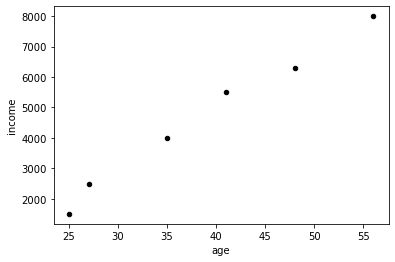

In [73]:
df.plot(kind='scatter', x='age', y='income', color = "black")
plt.show()

In [88]:
import statsmodels.api as sm
fit_1 = sm.OLS(age , income).fit()

In [82]:
fit_1.summary()

/opt/conda/envs/jupyterhub/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              182.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    1.02e-05
Time:                        18:07:37   Log-Likelihood:                         -24.354
No. Observations:                   7   AIC:                                      50.71
Df Residuals:                       6   BIC:                                      50.65
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0071      0.001     13.510      0.000       0.006       0.008
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.329
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.187
Skew:                          -0.298   Prob(JB):                        0.911
Kurtosis:                       2.467   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
fit_1.params

array([0.00712312])

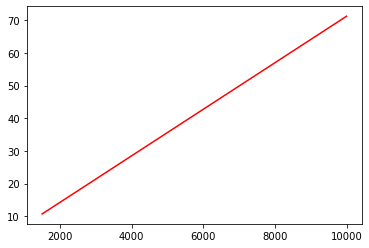

In [85]:
plt.plot(income, fit_1.fittedvalues, 'r')

In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

model = LinearRegression()
model.fit(X,y)
predictions = model.predict(X)

plt.plot(X,y,'o')
# change here
plt.plot(X, predictions, '-')
plt.show()

NameError: name 'X' is not defined

In [92]:
np.cov(age,income)

array([[1.99333333e+02, 4.22166667e+04],
       [4.22166667e+04, 9.05333333e+06]])